[Return to Main Page](https://social-lorax.github.io/guides/index.html)

<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/logos/geopandas.png?raw=true" style="width: 800px;">

In [1]:
#pip install geopandas

In [2]:
import pandas as pd
import geopandas
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt

%matplotlib inline

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# Importing

In [3]:
url = "https://raw.githubusercontent.com/social-lorax/howto_codebooks/master/Sheets_Py/Borough%20Boundaries.geojson"
boroughs = geopandas.read_file(url)

boroughs

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2,Bronx,1187193513.84,463868.937681,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,1,Manhattan,636575908.328,359804.890798,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,5,Staten Island,1623635734.34,325929.794027,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
3,3,Brooklyn,1934174208.45,728195.197649,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,Queens,3040205398.17,900270.512975,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# Geocoding

In [4]:
boro_halls = pd.DataFrame({"hall": ["New York City Hall", "Manhattan Municipal Building", "Bronx County Courthouse",
                                    "Brooklyn Borough Hall", "Queens Borough Hall", "Staten Island Borough Hall"],
                           "street": ["New York City Hall, New York, NY 10007", "31 Chambers St, New York, NY 10007",
                                      "851 Grand Concourse, Bronx, NY 10451", "209 Joralemon St, Brooklyn, NY 11201",
                                      "120-55 Queens Blvd, Queens, NY 11424", "10 Richmond Terrace, Staten Island, NY 10301"]})

boro_halls

,hall,street
0,New York City Hall,"New York City Hall, New York, NY 10007"
1,Manhattan Municipal Building,"31 Chambers St, New York, NY 10007"
2,Bronx County Courthouse,"851 Grand Concourse, Bronx, NY 10451"
3,Brooklyn Borough Hall,"209 Joralemon St, Brooklyn, NY 11201"
4,Queens Borough Hall,"120-55 Queens Blvd, Queens, NY 11424"
5,Staten Island Borough Hall,"10 Richmond Terrace, Staten Island, NY 10301"


### Cleaning Messy Addresses

In [5]:
#pip install usaddress

In [6]:
import usaddress

In [7]:
def clean_address(messy_address):
    address_dict, y = usaddress.tag(messy_address)
    
    elements = ["LandmarkName", "AddressNumber", "StreetName", "StreetNamePostType", "PlaceName", "StateName", "ZipCode"]    
    result = []
    
    for e in elements: 
        try:
            result.append(address_dict[e])
        except:
            result.append("")
        
    clean = str(result[0] + result[1] + " " + result[2] + " " + result[3] + ", " + 
                result[4] + ", " + result[5] + " " + result[6])
    clean = clean.replace("  ", " ")
    clean = clean.replace(" ,", ",")
    clean = clean.strip()
    
    return(clean)

In [8]:
boro_halls["clean_address"] = boro_halls["street"].apply(clean_address)

boro_halls

,hall,street,clean_address
0,New York City Hall,"New York City Hall, New York, NY 10007",", New York City Hall, New York, NY 10007"
1,Manhattan Municipal Building,"31 Chambers St, New York, NY 10007","31 Chambers St, New York, NY 10007"
2,Bronx County Courthouse,"851 Grand Concourse, Bronx, NY 10451","851 Grand Concourse, Bronx, NY 10451"
3,Brooklyn Borough Hall,"209 Joralemon St, Brooklyn, NY 11201","209 Joralemon St, Brooklyn, NY 11201"
4,Queens Borough Hall,"120-55 Queens Blvd, Queens, NY 11424","120-55 Queens Blvd, Queens, NY 11424"
5,Staten Island Borough Hall,"10 Richmond Terrace, Staten Island, NY 10301","10 Richmond Terrace, Staten Island, NY 10301"


### Geolocating

In [9]:
#pip install geopy

In [10]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [11]:
locator = Nominatim(user_agent = "boro_halls")
geocode = RateLimiter(locator.geocode, min_delay_seconds = 1)

boro_halls["geocoded"] = boro_halls["clean_address"].apply(geocode)
boro_halls["point"] = boro_halls["geocoded"].apply(lambda loc: tuple(loc.point) if loc else None)
boro_halls[["latitude", "longitude", "altitude"]] = pd.DataFrame(boro_halls["point"].tolist(), index = boro_halls.index)

boro_halls

,hall,street,clean_address,geocoded,point,latitude,longitude,altitude
0,New York City Hall,"New York City Hall, New York, NY 10007",", New York City Hall, New York, NY 10007","(New York City Hall, 260, Broadway, Lower Manh...","(40.712742950000006, -74.00595024412516, 0.0)",40.712743,-74.005950,0.0
1,Manhattan Municipal Building,"31 Chambers St, New York, NY 10007","31 Chambers St, New York, NY 10007","(Surrogate's Courthouse, 31, Chambers Street, ...","(40.7135665, -74.00448291108998, 0.0)",40.713566,-74.004483,0.0
2,Bronx County Courthouse,"851 Grand Concourse, Bronx, NY 10451","851 Grand Concourse, Bronx, NY 10451","(851, Grand Concourse, The Bronx, Bronx County...","(40.8261134, -73.9233196, 0.0)",40.826113,-73.923320,0.0
3,Brooklyn Borough Hall,"209 Joralemon St, Brooklyn, NY 11201","209 Joralemon St, Brooklyn, NY 11201","(209, Joralemon Street, Downtown Brooklyn, Bro...","(40.6926337, -73.9905375, 0.0)",40.692634,-73.990538,0.0
4,Queens Borough Hall,"120-55 Queens Blvd, Queens, NY 11424","120-55 Queens Blvd, Queens, NY 11424","(Queens Borough Hall, 120-55, Queens Boulevard...","(40.71378315, -73.828299424183, 0.0)",40.713783,-73.828299,0.0
5,Staten Island Borough Hall,"10 Richmond Terrace, Staten Island, NY 10301","10 Richmond Terrace, Staten Island, NY 10301","(Staten Island Borough Hall, 10, Richmond Terr...","(40.6424196, -74.07609217212325, 0.0)",40.642420,-74.076092,0.0


![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# Projection 

### Setting 

In [12]:
geo_halls = geopandas.GeoDataFrame(boro_halls, 
                                   geometry = geopandas.points_from_xy(boro_halls.longitude, boro_halls.latitude),
                                   crs = "EPSG:4326")

geo_halls

,hall,street,clean_address,geocoded,point,latitude,longitude,altitude,geometry
0,New York City Hall,"New York City Hall, New York, NY 10007",", New York City Hall, New York, NY 10007","(New York City Hall, 260, Broadway, Lower Manh...","(40.712742950000006, -74.00595024412516, 0.0)",40.712743,-74.005950,0.0,POINT (-74.00595 40.71274)
1,Manhattan Municipal Building,"31 Chambers St, New York, NY 10007","31 Chambers St, New York, NY 10007","(Surrogate's Courthouse, 31, Chambers Street, ...","(40.7135665, -74.00448291108998, 0.0)",40.713566,-74.004483,0.0,POINT (-74.00448 40.71357)
2,Bronx County Courthouse,"851 Grand Concourse, Bronx, NY 10451","851 Grand Concourse, Bronx, NY 10451","(851, Grand Concourse, The Bronx, Bronx County...","(40.8261134, -73.9233196, 0.0)",40.826113,-73.923320,0.0,POINT (-73.92332 40.82611)
3,Brooklyn Borough Hall,"209 Joralemon St, Brooklyn, NY 11201","209 Joralemon St, Brooklyn, NY 11201","(209, Joralemon Street, Downtown Brooklyn, Bro...","(40.6926337, -73.9905375, 0.0)",40.692634,-73.990538,0.0,POINT (-73.99054 40.69263)
4,Queens Borough Hall,"120-55 Queens Blvd, Queens, NY 11424","120-55 Queens Blvd, Queens, NY 11424","(Queens Borough Hall, 120-55, Queens Boulevard...","(40.71378315, -73.828299424183, 0.0)",40.713783,-73.828299,0.0,POINT (-73.82830 40.71378)
5,Staten Island Borough Hall,"10 Richmond Terrace, Staten Island, NY 10301","10 Richmond Terrace, Staten Island, NY 10301","(Staten Island Borough Hall, 10, Richmond Terr...","(40.6424196, -74.07609217212325, 0.0)",40.642420,-74.076092,0.0,POINT (-74.07609 40.64242)


<br> 

### Checking

In [13]:
geo_halls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<br> 

### Reprojecting

In [14]:
geo_halls.to_crs(crs = "EPSG:2263", inplace = True)
boroughs.to_crs(crs = "EPSG:2263", inplace = True)

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# Visualizing

In [15]:
import contextily

<br> 

### Basic Map

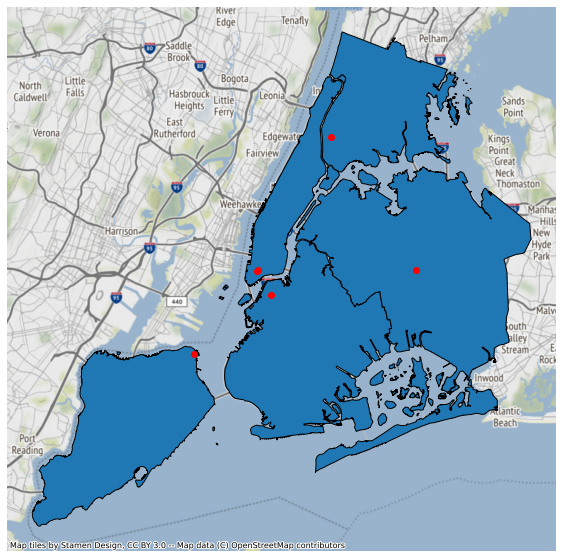

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
boroughs.plot(edgecolor='black', ax = ax)
geo_halls.plot(color = "red", ax = ax)
contextily.add_basemap(ax = ax, crs = "EPSG:2263")
ax.set_axis_off()
plt.show()

### Choropleths

**Continuous**

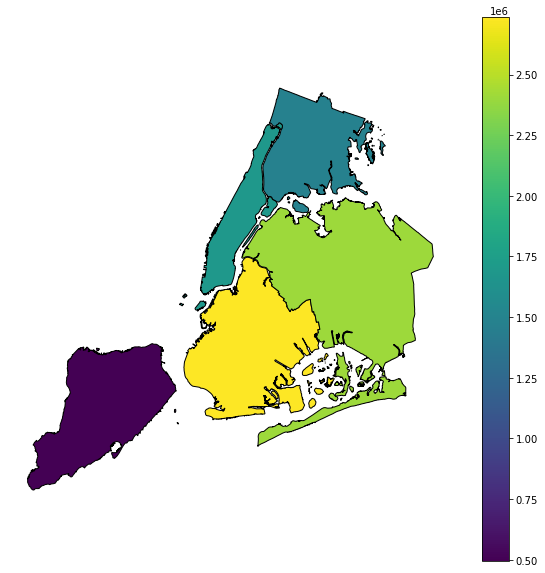

In [17]:
boroughs["population"] = [1472654, 1694251, 495747, 2736074, 2405464]

fig, ax = plt.subplots(figsize=(10, 10))
boroughs.plot(column = "population", 
              edgecolor='black', 
              legend = True, ax = ax)
ax.set_axis_off()
plt.show()

**Equal Interval** with k breaks

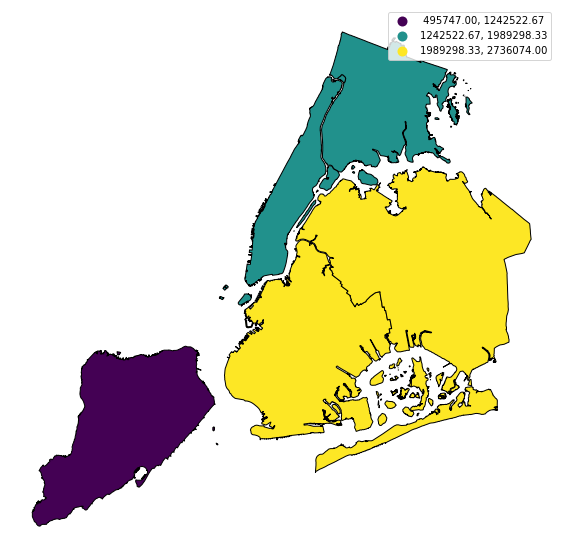

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
boroughs.plot(column = "population", scheme = "equal_interval", k = 3, 
              edgecolor='black',
              legend = True, ax = ax)
ax.set_axis_off()
plt.show()

**Quantile** with k breaks

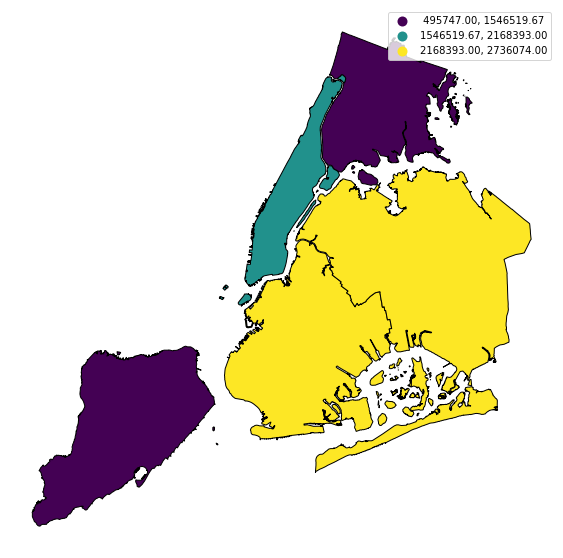

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
boroughs.plot(column = "population", scheme = "quantiles", k = 3, 
              edgecolor='black',
              legend = True, ax = ax)
ax.set_axis_off()
plt.show()

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# Analysis

### Within

In [20]:
nyc_cityhall = geo_halls.loc[0, 'geometry']
manhattan = boroughs.loc[1, 'geometry']

nyc_cityhall.within(manhattan)

True

<br>

### Contains

In [21]:
boroughs["City Hall"] = boroughs.contains(nyc_cityhall)

boroughs

,boro_code,boro_name,shape_area,shape_leng,geometry,population,City Hall
0,2,Bronx,1187193513.84,463868.937681,"MULTIPOLYGON (((1012821.787 229228.479, 101278...",1472654,False
1,1,Manhattan,636575908.328,359804.890798,"MULTIPOLYGON (((981219.022 188655.462, 980940....",1694251,True
2,5,Staten Island,1623635734.34,325929.794027,"MULTIPOLYGON (((970217.085 145643.397, 970227....",495747,False
3,3,Brooklyn,1934174208.45,728195.197649,"MULTIPOLYGON (((1022227.393 152028.338, 102207...",2736074,False
4,4,Queens,3040205398.17,900270.512975,"MULTIPOLYGON (((1032452.096 154469.461, 103245...",2405464,False


<br> 

### Touches

In [22]:
staten_island = boroughs.loc[2, 'geometry']

manhattan.touches(staten_island)

False

<br> 

### Distance

In [23]:
manhattan_hall = geo_halls.loc[1, 'geometry']

nyc_cityhall.distance(manhattan_hall)

505.4699914210155

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# New Geographies

/opt/conda/envs/PUI/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


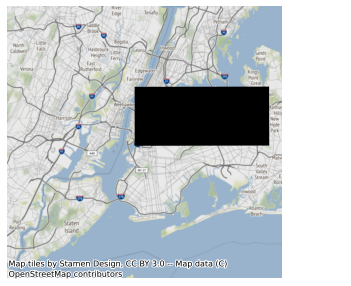

In [24]:
lat_point_list = [40.7, 40.7, 40.8, 40.8]
lon_point_list = [-74.0, -73.7, -73.7, -74.0]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}

blackbox = geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom]) 
blackbox.to_crs(crs = "EPSG:2263", inplace = True)

fig, ax = plt.subplots(figsize=(5, 5))
blackbox.plot(color = "black", ax = ax)
boroughs.plot(alpha = 0, ax = ax)
contextily.add_basemap(ax = ax, crs = "EPSG:2263")
ax.set_axis_off()
plt.show()

<br> 

### Intersection

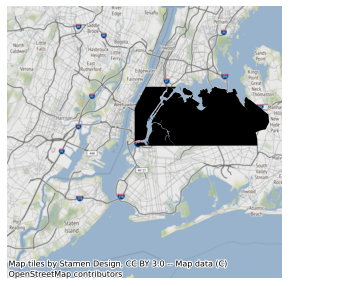

In [25]:
combined = geopandas.overlay(boroughs, blackbox, how = "intersection")

fig, ax = plt.subplots(figsize=(5, 5))
combined.plot(color = "black", ax = ax)
boroughs.plot(alpha = 0, ax = ax)
contextily.add_basemap(ax = ax, crs = "EPSG:2263")
ax.set_axis_off()
plt.show()

<br> 

### Difference 

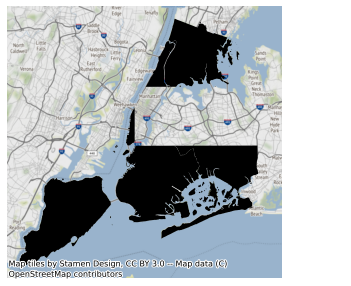

In [26]:
combined = geopandas.overlay(boroughs, blackbox, how = "difference")

fig, ax = plt.subplots(figsize=(5, 5))
combined.plot(color = "black", ax = ax)
boroughs.plot(alpha = 0, ax = ax)
contextily.add_basemap(ax = ax, crs = "EPSG:2263")
ax.set_axis_off()
plt.show()

<br>

### Union

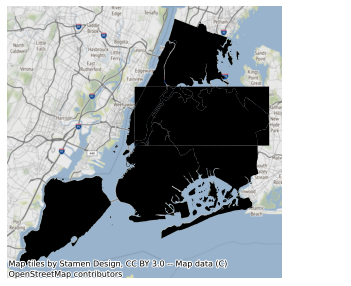

In [27]:
combined = geopandas.overlay(boroughs, blackbox, how = "union")

fig, ax = plt.subplots(figsize=(5, 5))
combined.plot(color = "black", ax = ax)
boroughs.plot(alpha = 0, ax = ax)
contextily.add_basemap(ax = ax, crs = "EPSG:2263")
ax.set_axis_off()
plt.show()

<br> 

### Buffering

/tmp/ipykernel_217/1431095665.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hall_buffers = geo_halls.buffer(0.01)


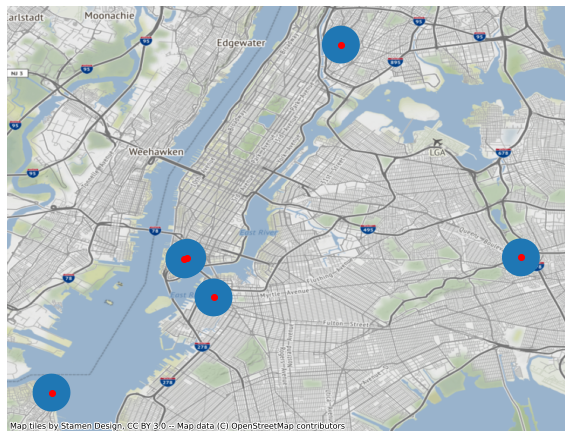

In [28]:
geo_halls.to_crs("EPSG:4326", inplace = True)

hall_buffers = geo_halls.buffer(0.01)

fig, ax = plt.subplots(figsize=(10, 10))
hall_buffers.plot(ax = ax)
geo_halls.plot(color= "red", ax = ax)
contextily.add_basemap(ax = ax, crs = "EPSG:4326")
ax.set_axis_off()
plt.show()

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

# Joins

`how` can be `left`, `right` or `inner`

`op` can be any of the fuctions above

In [29]:
geo_halls.crs == boroughs.crs

False

In [30]:
geo_halls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
boroughs.to_crs("EPSG:4326", inplace = True)

In [32]:
geopandas.sjoin(geo_halls[["hall", "clean_address", "geometry"]],
                boroughs[["boro_code", "boro_name", "geometry"]],
                how = "inner",
                op = "within")

,hall,clean_address,geometry,index_right,boro_code,boro_name
0,New York City Hall,", New York City Hall, New York, NY 10007",POINT (-74.00595 40.71274),1,1,Manhattan
1,Manhattan Municipal Building,"31 Chambers St, New York, NY 10007",POINT (-74.00448 40.71357),1,1,Manhattan
2,Bronx County Courthouse,"851 Grand Concourse, Bronx, NY 10451",POINT (-73.92332 40.82611),0,2,Bronx
3,Brooklyn Borough Hall,"209 Joralemon St, Brooklyn, NY 11201",POINT (-73.99054 40.69263),3,3,Brooklyn
4,Queens Borough Hall,"120-55 Queens Blvd, Queens, NY 11424",POINT (-73.82830 40.71378),4,4,Queens
5,Staten Island Borough Hall,"10 Richmond Terrace, Staten Island, NY 10301",POINT (-74.07609 40.64242),2,5,Staten Island


![](https://github.com/social-lorax/howto_codebooks/blob/master/images/underlines/python_underline.png?raw=true)

[Return to Main Page](https://social-lorax.github.io/guides/index.html)